
# Проверка гипотез с помощью python.

## Задание

* Выполнить проверку предложенной гипотезы
* Выполнить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-м уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию :

- Клиенты, которые ушли в течение последнего месяца — колонка называется `Churn`
- Услуги, на которые подписался каждый клиент — телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов — как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах — пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [27]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## Данные

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/1.4churn.csv', delimiter=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Опишем наш датафрейм в общем:
 - Всего 7043 строки, пустые строки (NaN) отсутствуют
 - Всего 21 колонка. Из них со значениями float64 1 колонка, int64 2 колонки, object 18 колонок
 - Объем занимаемый датафреймом 1.1+ MB

Рассмотрим статистику для числовых данных:

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


count - Всего значений
mean - Среднее арифметическое
std - Стандартное отклонение
min - Минимальное значение
25%
50% - Медиана
75%
max - Максимальное значение

SeniorCitizen - Является ли клиент пожилым гражданином
tenure - Количество месяцев, в течение которых клиент оставался в компании
MonthlyCharges - Сумма, взимаемая с клиента ежемесячно

**Вывод:**
**В колонке SeniorCitizen значения только 0 и 1, т.е. данные условно обозначают да/нет, поэтому тут мы обратим внимание на общее количество значений и уникальные значения. Пропусков данных нет, минимальное значение 0, максимальное 1**

**В колонке tenure уже данные о количестве месяцев, минимальное значение 0, максимальное 72. Пропусков данных нет. В среднем 32.37 месяца клиенты остаются в компании (не учитывая являются ли они клиентами сейчас). Стандартное отклонение от среднего - 24.56 что говорит: данные распределены в широком диапазоне от среднего значения. Медиана по колонке 29, т.е. половина выборки имеет значение больше медианы, вторая половина меньше.**

**В колонке MonthlyCharges также пропусков нет, среднее значение 64,76 а стандартное отклонение 30,09. Данные также находятся распределены в широком диапазоне от среднего. Минимальное значение 18.25 а максимальное 118.75. Медиана 70.35, т.е. половина выборки имеет значение больше медианы, вторая половина меньше.**

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [5]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


count - Всего значений
unique - Уникальные
top - Большее количество значений
freq - Количество top

**Вывод:**
**По всем колонкам нет пропущенных значений**
**- customerID - все значения уникальные, как и должно быть, так как это id** 
**- gender - в выборке больше клиентов с мужским полом (3555 записей)** 2 уникальных значения ['Female', 'Male']
**- Partner -  в выборке больше клиентов без партнера** 2 уникальных значения ['Yes', 'No']
**- Dependents - в выборке больше клиентов не являющимися кормильцами** 2 уникальных значения ['Yes', 'No']
**- PhoneService - в выборке больше клиентов которые пользуются телефонной связью** 2 уникальных значения ['Yes', 'No']
**- MultipleLines - в выборке больше клиентов у которых нет нескольких линий** 3 уникальных значения ['No phone service', 'No', 'Yes']
**- InternetService - в выборке больше клиентов у которых Fiber optic интернет** 3 уникальных значения ['DSL', 'Fiber optic', 'No']
**- OnlineSecurity - в выборке больше клиентов у которых нет онлайн-безопасности** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- OnlineBackup - в выборке больше клиентов у которых нет онлайн-резервного копирования** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- DeviceProtection - в выборке больше клиентов у которых нет защиты устройства** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- TechSupport - в выборке больше клиентов у которых нет технической поддержки (3473 записи)** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- streamingTV - в выборке больше клиентов у которых нет потокового телевидения (2810 записей)** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- streamingMovies - в выборке больше клиентов у которых нет стриминговых сервисов (2785 записей)** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- Contract - в выборке больше клиентов у которых срок действия контракта заказчика Month-to-month (3875 записей)** 3 уникальных значения ['Month-to-month', 'One year', 'Two year']
**- PaperlessBilling - в выборке больше клиентов у которых есть безналичные счета (4171 записей)** 2 уникальных значения ['Yes', 'No']
**- PaymentMethod - большее количество клиентов предпочитают Electronic check как способ оплаты (2365 записи)** 24 уникальных значения ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
**- TotalCharges - Общая сумма, списанная с клиента** 6531 уникальных значений
**- Churn - большее количество клиентов не ушло (5174 записей)** 2 уникальных значения ['Yes', 'No']

# По большому счету мы можем перевести значения из типа object в тип float и посчитать все значения как у числовых данных, сделаем это ниже:

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [7]:
len(df)- len(df.drop_duplicates ())

0

дубликаты не были обнаружены, но если бы они были мы могли воспользоваться:

In [8]:
df = df.drop_duplicates()

### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную — часто присутствует человеческий фактор. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [53]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [54]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы не потерять данные, а:

1) Заменить значения на другое
2) Поменять на другое — но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [55]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [56]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1043,4883-QICIH,Male,0,Yes,Yes,32,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.75,2347.90,Yes
3849,5089-IFSDP,Female,0,Yes,No,58,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.45,6144.55,Yes
5507,5753-QQWPW,Female,0,No,No,28,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,59.90,1654.70,No
5177,3672-YITQD,Male,1,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.10,3021.60,Yes
2395,6486-LHTMA,Female,1,Yes,No,31,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,One year,Yes,Electronic check,90.70,2835.50,No


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженной на количество времени?

Давайте посмотрим.

In [57]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Значит `TotalCharges` = `MonthlyCharges` * время. В данном датасете указано только количество месяцев, без точного времени, поэтому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0.

Заменим пропуски на нужное нам число.

In [58]:
df['TotalCharges'].fillna(0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod - не меняем, оставляем тип object
SeniorCitizen, tenure - не меняем, оставляем тип int64
MonthlyCharges, TotalCharges - не меняем, оставляем тип float64

**Вывод:**

# 4. Проверка гипотез

Задание: сравнить две выборки — `Churn='No'` и `Churn='Yes'` 

Гипотеза — среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

Создадим 2 датафрейма:

In [17]:
churn_no = df[df['Churn'] == 'No']
churn_no.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [18]:
churn_yes = df[df['Churn'] == 'Yes']
churn_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [19]:
churn_no['tenure'].mean()

37.56996521066873

In [20]:
churn_yes['tenure'].mean()

17.979133226324237

In [21]:
t_stat, pvalue = stats.ttest_ind(churn_no['tenure'], churn_yes['tenure'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Альтернативная Гипотеза подтверждена — среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

**Вывод:**

## 5. Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ — соответствуют ли распределения нормальному?

**Нулевая гипотеза - распределение значений в выборке соответствует нормальному распределению**
**Альтернативная гипотеза - распределение значений в выборке не соответствует нормальному распределению**

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

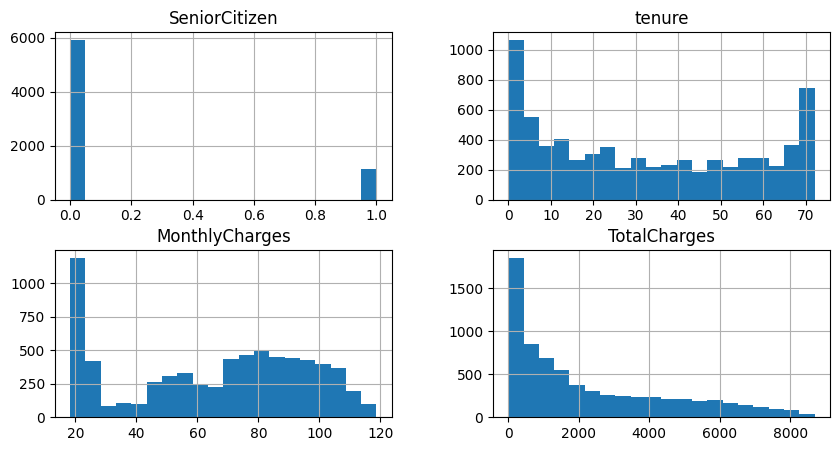

In [21]:
df.hist(bins=20, figsize=(10,5))

Просто взглянув на эту гистограмму, мы можем сказать, что набор данных не имеет «колокольчатой формы» и не имеет нормального распределения.

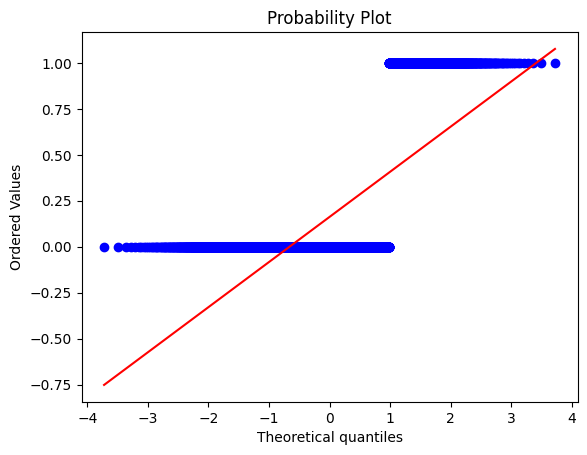

In [22]:
import pylab

stats.probplot(df['SeniorCitizen'], dist='norm', plot=pylab)
pylab.show()

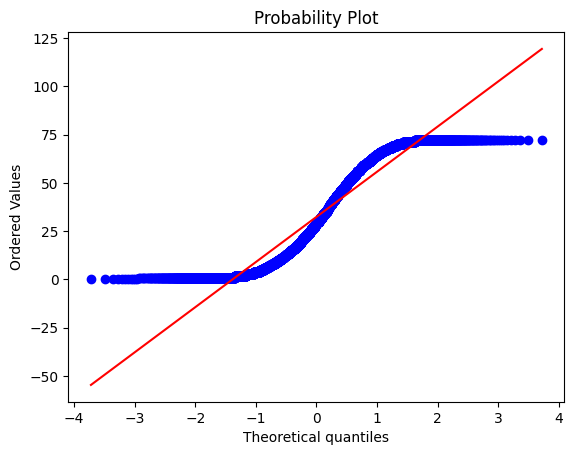

In [23]:
stats.probplot(df['tenure'], dist='norm', plot=pylab)
pylab.show()

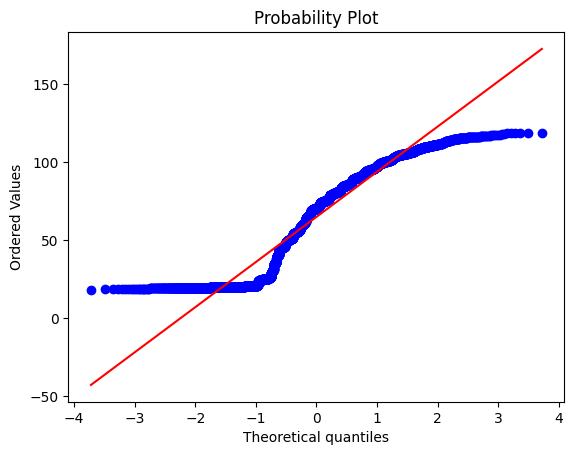

In [24]:
stats.probplot(df['MonthlyCharges'], dist='norm', plot=pylab)
pylab.show()

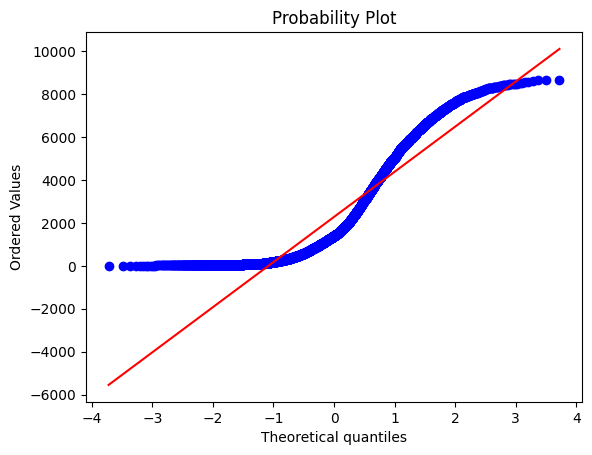

In [25]:
stats.probplot(df['TotalCharges'], dist='norm', plot=pylab)
pylab.show()

На этих графиках мы так же видим не нормальное распределение, так как при нормальном все точки были бы расположены вдоль "диагональной" линии

In [26]:
from scipy.stats import shapiro 

df_ = np.random.normal(loc=50, scale=20, size=5000)

print(shapiro(df['SeniorCitizen']))
print(shapiro(df['tenure']))
print(shapiro(df['MonthlyCharges']))
print(shapiro(df['TotalCharges']))

ShapiroResult(statistic=0.4433855414390564, pvalue=0.0)
ShapiroResult(statistic=0.9037514925003052, pvalue=0.0)
ShapiroResult(statistic=0.9208890199661255, pvalue=0.0)
ShapiroResult(statistic=0.8601522445678711, pvalue=0.0)


C:\Users\1will\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу 

Это означает, что у нас есть достаточно доказательств, чтобы сказать, что данные выборки не получены из нормального распределения.

**Вывод:**

На выборке из 7043 строк мы проверили следующую работу:

- Посмотрели общую статистику по количественным и категориальным переменным
- Преобразовали колонку TotalCharges для анализа
- Проверили выборки по `Churn='No'` и `Churn='Yes'`, подтвердили альтернативную гипотезу (среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками)
- Проверили выборку на нормальное распределение и подтвердили альтернативную гипотезу (распределение значений в выборке не соответствует нормальному распределению)

## 6. ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика — выяснить причину ухода клиента.

Ваша задача — провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1.	Предобработка данных — измените датасет в части: категориальные признаки надо перевести в числовые представления. Главное —понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное.
2.	Выберите нужные гипотезы, основываясь на типах признаков.
3.	Проведите анализ и выясните, почему клиент уходит, с чем коррелирует Churn, может это зависит от пола клиента? Или есть иные обстоятельства?
4.	После проверки гипотез постройте тепловую карту корреляции Phik и сделайте дополнительный вывод.
5.	Дополните общий вывод.


**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

Сначала взглянем на общую таблицу и подумаем какие категориальные признаки надо перевести в числовые представления

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


На мой взгляд нужно перевести значения: 
**- gender** 2 уникальных значения ['Female', 'Male']
**- Partner** 2 уникальных значения ['Yes', 'No']
**- Dependents** 2 уникальных значения ['Yes', 'No']
**- PhoneService** 2 уникальных значения ['Yes', 'No']
**- MultipleLines** 3 уникальных значения ['No phone service', 'No', 'Yes']
**- InternetService** 3 уникальных значения ['DSL', 'Fiber optic', 'No']
**- OnlineSecurity** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- OnlineBackup** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- DeviceProtection** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- TechSupport** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- StreamingTV** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- StreamingMovies** 3 уникальных значения ['No', 'Yes', 'No internet service']
**- Contract** 3 уникальных значения ['Month-to-month', 'One year', 'Two year']
**- PaymentMethod** 4 уникальных значения ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

Ну и соответственно Churn:
**- Churn** 2 уникальных значения ['Yes', 'No']

In [77]:
df['gender'] = pd.factorize(df['gender'])[ 0 ]                      # 0-Female          1-Male
df['Partner'] = pd.factorize(df['Partner'])[ 0 ]                    # 1-Yes             0-No
df['Dependents'] = pd.factorize(df['Dependents'])[ 0 ]              # 1-Yes             0-No
df['PhoneService'] = pd.factorize(df['PhoneService'])[ 0 ]          # 1-Yes             0-No
df['MultipleLines'] = pd.factorize(df['MultipleLines'])[ 0 ]        # 2-Yes             1-No                0-No phone service
df['InternetService'] = pd.factorize(df['InternetService'])[ 0 ]    # 0-DSL             1-Fiber optic       2-No
df['OnlineSecurity'] = pd.factorize(df['OnlineSecurity'])[ 0 ]      # 1-Yes             0-No                2-No internet service
df['OnlineBackup'] = pd.factorize(df['OnlineBackup'])[ 0 ]          # 1-Yes             0-No                2-No internet service
df['DeviceProtection'] = pd.factorize(df['DeviceProtection'])[ 0 ]  # 1-Yes             0-No                2-No internet service
df['TechSupport'] = pd.factorize(df['TechSupport'])[ 0 ]            # 1-Yes             0-No                2-No internet service
df['StreamingTV'] = pd.factorize(df['StreamingTV'])[ 0 ]            # 1-Yes             0-No                2-No internet service
df['StreamingMovies'] = pd.factorize(df['StreamingMovies'])[ 0 ]    # 1-Yes             0-No                2-No internet service
df['Contract'] = pd.factorize(df['Contract'])[ 0 ]                  # 0-Month-to-month  2-One year          1-Two year
df['PaymentMethod'] = pd.factorize(df['PaymentMethod'])[ 0 ]        # 0-Electronic check    1-Mailed check  2-Bank transfer (automatic)     3-Credit card (automatic)
df['Churn'] = pd.factorize(df['Churn'])[ 0 ]                        # 1-Yes             0-No

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Yes,0,29.85,29.85,0
1,5575-GNVDE,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,No,1,56.95,1889.50,0
2,3668-QPYBK,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,Yes,1,53.85,108.15,1
3,7795-CFOCW,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,No,2,42.30,1840.75,0
4,9237-HQITU,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,Yes,0,70.70,151.65,1


Теперь определимся с гипотезами:
Остались клиенты или нет (на мой взгляд) может зависеть от следующих факторов: 

# - SeniorCitizen(Является ли клиент пожилым гражданином).
*Нулевая гипотеза: Количество пожилых клиентов, отказавшиеся от услуг равно количеству не пожилых клиентов, отказавшиеся от услуг*
*Альтернативная гипотеза: Количество пожилых клиентов, отказавшиеся от услуг отличается от количества не пожилых клиентов, отказавшиеся от услуг*

# - gender (пол клиента). 
*Нулевая гипотеза: Количество мужчин, отказавшиеся от услуг равно количеству женщин, отказавшиеся от услуг*
*Альтернативная гипотеза: Количество мужчин, отказавшиеся от услуг отличается от количества женщин, отказавшиеся от услуг*

# - Partner (есть ли у клиента партнер). 
*Нулевая гипотеза: Количество клиентов без партнера, отказавшиеся от услуг равно количеству клиентов с партнером отказавшихся от услуг*
*Альтернативная гипотеза: Количество клиентов без партнера, отказавшиеся от услуг отличается от количества клиентов с партнером отказавшихся от услуг*

# - Dependents (Является ли клиент кормильцем).
*Нулевая гипотеза: Количество клиентов-кормильцев, отказавшиеся от услуг равно количеству клиентов-не-кормильцев отказавшихся от услуг*
*Альтернативная гипотеза: Количество клиентов-кормильцев, отказавшиеся от услуг отличается от количества клиентов-не-кормильцев отказавшихся от услуг*

# - PhoneService (Есть ли у клиента телефонная связь).
*Гипотеза: Клиенты с телефонной связью реже отказываются от услуг компании*

# - MultipleLines (Есть ли у клиента несколько линий).
*Гипотеза: Клиенты с несколькими линиями связью реже отказываются от услуг компании*

# - InternetService (Интернет-провайдер клиента).
*Гипотеза: Клиенты с Fiber optic интернетом реже отказываются от услуг компании*
    
# - OnlineSecurity (Есть ли у клиента онлайн-безопасность).
*Гипотеза: Клиенты с онлайн-безопасностью реже отказываются от услуг компании*

# - OnlineBackup (Есть ли у клиента онлайн-резервное копирование).
*Гипотеза: Клиенты с онлайн-резервным копированием реже отказываются от услуг компании*

# - DeviceProtection (Имеет ли клиент защиту устройства).
*Гипотеза: Клиенты с защитой устройств реже отказываются от услуг компании*

# - TechSupport (Есть ли у клиента техническая поддержка).
*Гипотеза: Клиенты с технической поддержкой реже отказываются от услуг компании*

# - streamingTV (Есть ли у клиента потоковое телевидение).
*Гипотеза: Клиенты с потоковым телевидинием реже отказываются от услуг компании*

# - streamingMovies (Есть ли у клиента стриминговые сервисы).
*Гипотеза: Клиенты со стриминговым сервисом реже отказываются от услуг компании*

# - Contract (Срок действия контракта заказчика).
*Гипотеза 1: Клиенты со сроком действия контракта 'One year' реже отказываются от услуг компании*
*Гипотеза 2: Клиенты со сроком действия контракта 'Two year' реже отказываются от услуг компании*
*Гипотеза 3: Клиенты со сроком действия контракта 'Month-to-month' чаще отказываются от услуг компании*

# - PaymentMethod (Способ оплаты клиента).
*Гипотеза 1: Клиенты со способом оплаты 'Bank transfer (automatic)' реже отказываются от услуг компании*
*Гипотеза 2: Клиенты со способом оплаты 'Credit card (automatic)' реже отказываются от услуг компании*
*Гипотеза 3: Клиенты со способом оплаты 'Electronic check' чаще отказываются от услуг компании*
*Гипотеза 4: Клиенты со способом оплаты 'Mailed check' чаще отказываются от услуг компании*



'gender'            0-Female            1-Male
'Partner'           1-Yes               0-No
'Dependents'        1-Yes               0-No
'PhoneService'      1-Yes               0-No
'MultipleLines'     2-Yes               1-No                0-No phone service
'InternetService'   0-DSL               1-Fiber optic       2-No
'OnlineSecurity'    1-Yes               0-No                2-No internet service
'OnlineBackup'      1-Yes               0-No                2-No internet service
'DeviceProtection'  1-Yes               0-No                2-No internet service
'TechSupport'       1-Yes               0-No                2-No internet service
'StreamingTV'       1-Yes               0-No                2-No internet service
'StreamingMovies'   1-Yes               0-No                2-No internet service
'Contract'          0-Month-to-month    2-One year          1-Two year
'PaymentMethod'     0-Electronic check  1-Mailed check      2-Bank transfer (automatic)     3-Credit card (automatic)
'Churn'             1-Yes               0-No

In [187]:
df_del = df[df.OnlineSecurity < 2]

In [188]:
churn_no = df_del[df_del['Churn'] == 0]
churn_yes = df_del[df_del['Churn'] == 1]

# Пройдемся по гипотезам:

# - SeniorCitizen (Является ли клиент пожилым гражданином).
*Нулевая гипотеза: Количество пожилых клиентов, отказавшиеся от услуг равно количеству не пожилых клиентов, отказавшиеся от услуг*
*Альтернативная гипотеза: Количество пожилых клиентов, отказавшиеся от услуг отличается от количества не пожилых клиентов, отказавшиеся от услуг*

In [203]:
churn_no['SeniorCitizen'].value_counts()

SeniorCitizen
0    3142
1     619
Name: count, dtype: int64

In [204]:
churn_yes['SeniorCitizen'].value_counts()

SeniorCitizen
0    1285
1     471
Name: count, dtype: int64

In [205]:
print(f"MultipleLines churn_no среднее {churn_no['MultipleLines'].mean()}")
print(f"MultipleLines churn_yes среднее {churn_yes['MultipleLines'].mean()}")

MultipleLines churn_no среднее 1.3395373570858815
MultipleLines churn_yes среднее 1.3815489749430523


In [206]:
t_stat, pvalue = stats.ttest_ind(churn_no['SeniorCitizen'], churn_yes['SeniorCitizen'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Мы видим, что значения отличаются подтверждаем *Альтернативную гипотезу: Количество пожилых клиентов, отказавшиеся от услуг отличается от количества не пожилых клиентов, отказавшиеся от услуг*

# - gender (пол клиента). 
*Нулевая гипотеза: Количество мужчин, отказавшиеся от услуг равно количеству женщин, отказавшиеся от услуг*
*Альтернативная гипотеза: Количество мужчин, отказавшиеся от услуг отличается от количества женщин, отказавшиеся от услуг*


In [207]:
churn_no['gender'].value_counts()

gender
1    1903
0    1858
Name: count, dtype: int64

In [208]:
churn_yes['gender'].value_counts()

gender
0    883
1    873
Name: count, dtype: int64

In [209]:
print(f"gender churn_no среднее {churn_no['gender'].mean()}")
print(f"gender churn_yes среднее {churn_yes['gender'].mean()}")

gender churn_no среднее 0.5059824514756713
gender churn_yes среднее 0.4971526195899772


In [210]:
t_stat, pvalue = stats.ttest_ind(churn_no['gender'], churn_yes['gender'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.54127. Подтверждается нулевая гипотеза


Подтверждаем *Нулевую гипотезу: Количество мужчин, отказавшиеся от услуг равно количеству женщин, отказавшиеся от услуг*

# - Partner (есть ли у клиента партнер). 
*Нулевая гипотеза: Количество клиентов без партнера, отказавшиеся от услуг равно количеству клиентов с партнером отказавшихся от услуг*
*Альтернативная гипотеза: Количество клиентов без партнера, отказавшиеся от услуг отличается от количества клиентов с партнером отказавшихся от услуг*

In [211]:
churn_no['Partner'].value_counts()

Partner
0    2024
1    1737
Name: count, dtype: int64

In [212]:
churn_yes['Partner'].value_counts()

Partner
1    1116
0     640
Name: count, dtype: int64

In [213]:
print(f"Partner churn_no среднее {churn_no['Partner'].mean()}")
print(f"Partner churn_yes среднее {churn_yes['Partner'].mean()}")

Partner churn_no среднее 0.4618452539218293
Partner churn_yes среднее 0.6355353075170843


In [214]:
t_stat, pvalue = stats.ttest_ind(churn_no['Partner'], churn_yes['Partner'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Подтверждаем *Альтернативную гипотезу: Количество клиентов без партнера, отказавшиеся от услуг отличается от количества клиентов с партнером отказавшихся от услуг*

# - Dependents (Является ли клиент кормильцем).
*Нулевая гипотеза: Количество клиентов-кормильцев, отказавшиеся от услуг равно количеству клиентов-не-кормильцев отказавшихся от услуг*
*Альтернативная гипотеза: Количество клиентов-кормильцев, отказавшиеся от услуг отличается от количества клиентов-не-кормильцев отказавшихся от услуг*

In [215]:
churn_no['Dependents'].value_counts()

Dependents
0    2592
1    1169
Name: count, dtype: int64

In [216]:
churn_yes['Dependents'].value_counts()

Dependents
0    1458
1     298
Name: count, dtype: int64

In [217]:
print(f"Dependents churn_no среднее {churn_no['Dependents'].mean()}")
print(f"Dependents churn_yes среднее {churn_yes['Dependents'].mean()}")

Dependents churn_no среднее 0.31082159000265885
Dependents churn_yes среднее 0.16970387243735763


In [218]:
t_stat, pvalue = stats.ttest_ind(churn_no['Dependents'], churn_yes['Dependents'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Подтверждаем *Альтернативную гипотезу: Количество клиентов-кормильцев, отказавшиеся от услуг отличается от количества клиентов-не-кормильцев отказавшихся от услуг*

# - PhoneService (Есть ли у клиента телефонная связь).
*Гипотеза: Клиенты с телефонной связью реже отказываются от услуг компании*

In [219]:
churn_no['PhoneService'].value_counts()

PhoneService
1    3249
0     512
Name: count, dtype: int64

In [220]:
churn_yes['PhoneService'].value_counts()

PhoneService
1    1586
0     170
Name: count, dtype: int64

In [221]:
print(f"PhoneService churn_no среднее {churn_no['PhoneService'].mean()}")
print(f"PhoneService churn_yes среднее {churn_yes['PhoneService'].mean()}")

PhoneService churn_no среднее 0.863865993086945
PhoneService churn_yes среднее 0.9031890660592256


In [222]:
t_stat, pvalue = stats.ttest_ind(churn_no['PhoneService'], churn_yes['PhoneService'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00004. Нулевая гипотеза отвергается


Отвергаем *Гипотезу: Клиенты с телефонной связью реже отказываются от услуг компании*

# - MultipleLines (Есть ли у клиента несколько линий).
*Гипотеза: Клиенты с несколькими линиями связью реже отказываются от услуг компании*

In [223]:
churn_no['MultipleLines'].value_counts()

MultipleLines
2    1789
1    1460
0     512
Name: count, dtype: int64

In [224]:
churn_yes['MultipleLines'].value_counts()

MultipleLines
2    840
1    746
0    170
Name: count, dtype: int64

In [225]:
print(f"MultipleLines churn_no среднее {churn_no['MultipleLines'].mean()}")
print(f"MultipleLines churn_yes среднее {churn_yes['MultipleLines'].mean()}")

MultipleLines churn_no среднее 1.3395373570858815
MultipleLines churn_yes среднее 1.3815489749430523


In [226]:
t_stat, pvalue = stats.ttest_ind(churn_no['MultipleLines'], churn_yes['MultipleLines'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.03506. Нулевая гипотеза отвергается


Отвергаем *Гипотеза: Клиенты с несколькими линиями связью реже отказываются от услуг компании*

# - InternetService (Интернет-провайдер клиента).
*Гипотеза: Клиенты с InternetService  реже отказываются от услуг компании*


In [227]:
churn_no['InternetService'].value_counts()

InternetService
0    1962
1    1799
Name: count, dtype: int64

In [228]:
churn_yes['InternetService'].value_counts()

InternetService
1    1297
0     459
Name: count, dtype: int64

In [229]:
print(f"InternetService churn_no среднее {churn_no['InternetService'].mean()}")
print(f"InternetService churn_yes среднее {churn_yes['InternetService'].mean()}")

InternetService churn_no среднее 0.4783302313214571
InternetService churn_yes среднее 0.7386104783599089


In [230]:
t_stat, pvalue = stats.ttest_ind(churn_no['InternetService'], churn_yes['InternetService'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Отвергаем *Гипотеза: Клиенты с InternetService реже отказываются от услуг компании*

# - OnlineSecurity (Есть ли у клиента онлайн-безопасность).
*Гипотеза: Клиенты с онлайн-безопасностью реже отказываются от услуг компании*

In [231]:
churn_no['OnlineSecurity'].value_counts()

OnlineSecurity
0    2037
1    1724
Name: count, dtype: int64

In [232]:
churn_yes['OnlineSecurity'].value_counts()

OnlineSecurity
0    1461
1     295
Name: count, dtype: int64

In [233]:
print(f"OnlineSecurity churn_no среднее {churn_no['OnlineSecurity'].mean()}")
print(f"OnlineSecurity churn_yes среднее {churn_yes['OnlineSecurity'].mean()}")

OnlineSecurity churn_no среднее 0.4583887264025525
OnlineSecurity churn_yes среднее 0.16799544419134396


In [234]:
t_stat, pvalue = stats.ttest_ind(churn_no['OnlineSecurity'], churn_yes['OnlineSecurity'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Отвергаем *Гипотеза: Клиенты с онлайн-безопасностью реже отказываются от услуг компании*


# - OnlineBackup (Есть ли у клиента онлайн-резервное копирование).
*Гипотеза: Клиенты с онлайн-резервным копированием реже отказываются от услуг компании*

In [235]:
churn_no['OnlineBackup'].value_counts()

OnlineBackup
0    1906
1    1855
Name: count, dtype: int64

In [236]:
churn_yes['OnlineBackup'].value_counts()

OnlineBackup
1    1233
0     523
Name: count, dtype: int64

In [237]:
print(f"OnlineBackup churn_no среднее {churn_no['OnlineBackup'].mean()}")
print(f"OnlineBackup churn_yes среднее {churn_yes['OnlineBackup'].mean()}")

OnlineBackup churn_no среднее 0.49321988832757246
OnlineBackup churn_yes среднее 0.7021640091116174


In [238]:
t_stat, pvalue = stats.ttest_ind(churn_no['OnlineBackup'], churn_yes['OnlineBackup'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Отвергаем *Гипотеза: Клиенты с онлайн-резервным копированием реже отказываются от услуг компании*


# - DeviceProtection (Имеет ли клиент защиту устройства).
*Гипотеза: Клиенты с защитой устройств реже отказываются от услуг компании*


In [239]:
churn_no['DeviceProtection'].value_counts()

DeviceProtection
0    1884
1    1877
Name: count, dtype: int64

In [240]:
churn_yes['DeviceProtection'].value_counts()

DeviceProtection
0    1211
1     545
Name: count, dtype: int64

In [241]:
print(f"DeviceProtection churn_no среднее {churn_no['DeviceProtection'].mean()}")
print(f"DeviceProtection churn_yes среднее {churn_yes['DeviceProtection'].mean()}")

DeviceProtection churn_no среднее 0.4990693964371178
DeviceProtection churn_yes среднее 0.3103644646924829


In [242]:
t_stat, pvalue = stats.ttest_ind(churn_no['DeviceProtection'], churn_yes['DeviceProtection'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Отвергаем *Гипотеза: Клиенты с защитой устройств реже отказываются от услуг компании*

# - TechSupport (Есть ли у клиента техническая поддержка).
*Гипотеза: Клиенты с технической поддержкой реже отказываются от услуг компании*

In [243]:
churn_no['TechSupport'].value_counts()

TechSupport
0    2027
1    1734
Name: count, dtype: int64

In [244]:
churn_yes['TechSupport'].value_counts()

TechSupport
0    1446
1     310
Name: count, dtype: int64

In [245]:
print(f"TechSupport churn_no среднее {churn_no['TechSupport'].mean()}")
print(f"TechSupport churn_yes среднее {churn_yes['TechSupport'].mean()}")

TechSupport churn_no среднее 0.46104759372507315
TechSupport churn_yes среднее 0.1765375854214123


In [246]:
t_stat, pvalue = stats.ttest_ind(churn_no['TechSupport'], churn_yes['TechSupport'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Отвергаем *Гипотеза: Клиенты с технической поддержкой реже отказываются от услуг компании*

# - StreamingTV (Есть ли у клиента потоковое телевидение).
*Гипотеза: Клиенты с потоковым телевидинием реже отказываются от услуг компании*

In [247]:
churn_no['StreamingTV'].value_counts()

StreamingTV
1    1893
0    1868
Name: count, dtype: int64

In [248]:
churn_yes['StreamingTV'].value_counts()

StreamingTV
0    942
1    814
Name: count, dtype: int64

In [249]:
print(f"StreamingTV churn_no среднее {churn_no['StreamingTV'].mean()}")
print(f"StreamingTV churn_yes среднее {churn_yes['StreamingTV'].mean()}")

StreamingTV churn_no среднее 0.5033235841531507
StreamingTV churn_yes среднее 0.4635535307517084


In [250]:
t_stat, pvalue = stats.ttest_ind(churn_no['StreamingTV'], churn_yes['StreamingTV'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00591. Нулевая гипотеза отвергается


Отвергаем *Гипотеза: Клиенты с потоковым телевидинием реже отказываются от услуг компании*

# - StreamingMovies (Есть ли у клиента стриминговые сервисы).
*Гипотеза: Клиенты со стриминговым сервисом реже отказываются от услуг компании*

In [251]:
churn_no['StreamingMovies'].value_counts()

StreamingMovies
1    1914
0    1847
Name: count, dtype: int64

In [252]:
churn_yes['StreamingMovies'].value_counts()

StreamingMovies
0    938
1    818
Name: count, dtype: int64

In [253]:
print(f"StreamingMovies churn_no среднее {churn_no['StreamingMovies'].mean()}")
print(f"StreamingMovies churn_yes среднее {churn_yes['StreamingMovies'].mean()}")

StreamingMovies churn_no среднее 0.508907205530444
StreamingMovies churn_yes среднее 0.46583143507972663


In [254]:
t_stat, pvalue = stats.ttest_ind(churn_no['StreamingMovies'], churn_yes['StreamingMovies'])
alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00287. Нулевая гипотеза отвергается


Отвергаем *Гипотеза: Клиенты со стриминговым сервисом реже отказываются от услуг компании*

# - Contract (Срок действия контракта заказчика).
*Гипотеза 1: Клиенты со сроком действия контракта 'One year' реже отказываются от услуг компании*
*Гипотеза 2: Клиенты со сроком действия контракта 'Two year' реже отказываются от услуг компании*
*Гипотеза 3: Клиенты со сроком действия контракта 'Month-to-month' чаще отказываются от услуг компании*

'Contract'          0-Month-to-month    2-One year          1-Two year

In [257]:
churn_no2 = df[df['Churn'] == 0]
churn_yes2 = df[df['Churn'] == 1]

In [258]:
churn_no['Contract'].value_counts()

Contract
0    1795
2    1014
1     952
Name: count, dtype: int64

In [259]:
churn_yes['Contract'].value_counts()

Contract
0    1556
1     157
2      43
Name: count, dtype: int64

In [269]:
print(f" Договор Month-to-month ушли {1556/7043*100} %")
print(f" Договор Month-to-month остались {1795/7043*100} %")
print()
print(f" Договор One year ушли {157/7043*100} %")
print(f" Договор One year остались {1014/7043*100} %")
print()
print(f" Договор Two year ушли {43/7043*100} %")
print(f" Договор Two year остались {952/7043*100} %")

 Договор Month-to-month ушли 22.092858157035355 %
 Договор Month-to-month остались 25.486298452364046 %

 Договор One year ушли 2.2291637086468836 %
 Договор One year остались 14.397273888967769 %

 Договор Two year ушли 0.6105352832599744 %
 Договор Two year остались 13.516967201476643 %


Судя по процентным соотношениям:
Month-to-month одинаковое количество ушли/остались
One year, Two year чаще остаются

# - PaymentMethod (Способ оплаты клиента).
*Гипотеза 1: Клиенты со способом оплаты 'Bank transfer (automatic)' реже отказываются от услуг компании*
*Гипотеза 2: Клиенты со способом оплаты 'Credit card (automatic)' реже отказываются от услуг компании*
*Гипотеза 3: Клиенты со способом оплаты 'Electronic check' чаще отказываются от услуг компании*
*Гипотеза 4: Клиенты со способом оплаты 'Mailed check' чаще отказываются от услуг компании*

'PaymentMethod'     0-Electronic check  1-Mailed check      2-Bank transfer (automatic)     3-Credit card (automatic)

In [260]:
churn_no['PaymentMethod'].value_counts()

PaymentMethod
0    1187
2     972
3     968
1     634
Name: count, dtype: int64

In [261]:
churn_yes['PaymentMethod'].value_counts()

PaymentMethod
0    1056
2     240
1     237
3     223
Name: count, dtype: int64

In [271]:
print(f" Способ оплаты Electronic check ушли {1056/7043*100} %")
print(f" Способ оплаты Electronic check остались {1187/7043*100} %")
print()
print(f" Способ оплаты Bank transfer (automatic) ушли {240/7043*100} %")
print(f" Способ оплаты Bank transfer (automatic) остались {972/7043*100} %")
print()
print(f" Способ оплаты Credit card (automatic) ушли {223/7043*100} %")
print(f" Способ оплаты Credit card (automatic) остались {968/7043*100} %")
print()
print(f" Способ оплаты Mailed check ушли {237/7043*100} %")
print(f" Способ оплаты Mailed check остались {634/7043*100} %")

 Способ оплаты Electronic check ушли 14.99361067726821 %
 Способ оплаты Electronic check остались 16.8536135169672 %

 Способ оплаты Bank transfer (automatic) ушли 3.4076387902882295 %
 Способ оплаты Bank transfer (automatic) остались 13.80093710066733 %

 Способ оплаты 3-Credit card (automatic) ушли 3.1662643759761466 %
 Способ оплаты 3-Credit card (automatic) остались 13.744143120829191 %

 Способ оплаты Mailed check ушли 3.3650433054096265 %
 Способ оплаты Mailed check остались 9.00184580434474 %


Судя по процентным соотношениям:
Electronic check одинаковое количество ушли/остались
Bank transfer (automatic), Credit card (automatic), Mailed check чаще оставались

# Тепловая карта корреляции Phik

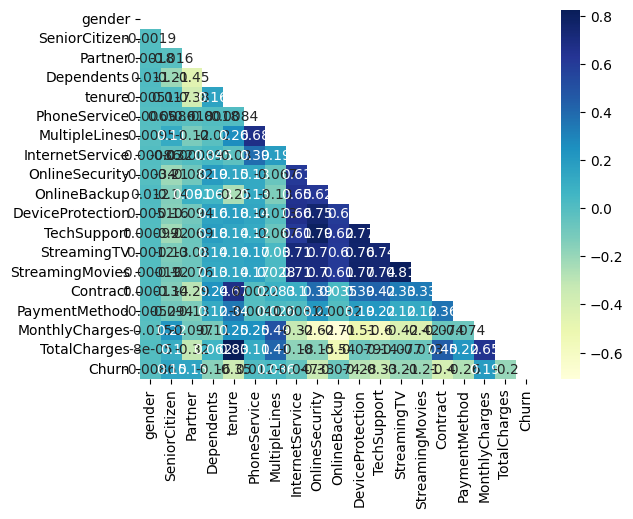

In [86]:
import seaborn as sb
import matplotlib.pyplot as mp

df_phik = df.copy()
df_phik = df_phik.drop('customerID', axis=1)
df_phik = df_phik.drop('PaperlessBilling', axis=1)


mask = np.triu(np.ones_like(df_phik.corr()))
dataplot = sb.heatmap(df_phik.corr(), cmap="YlGnBu", annot=True, mask=mask)
mp.show()

In [87]:
df_phik_с = df_phik.corr()
df_phik_с

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,-0.005209,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.016567,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.093704,0.220173,0.103006,0.150889
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.379697,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.133115,-0.096848,-0.317504,0.150448
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.159712,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.123844,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,-0.379697,0.159712,1.000000,0.008448,0.258958,-0.030359,0.145298,-0.253743,0.178649,0.144459,0.136145,0.140781,0.671607,0.340305,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,0.008448,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.004070,0.247398,0.113214,0.011942
MultipleLines,-0.009451,0.113791,-0.117307,-0.019657,0.258958,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,0.025676,0.490700,0.412104,0.036310
InternetService,-0.000863,-0.032310,-0.000891,0.044590,-0.030359,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.008124,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.145298,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.213800,-0.621227,-0.154380,-0.332819
OnlineBackup,0.012230,-0.144828,0.090753,0.062775,-0.253743,0.129770,-0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.003183,-0.710477,-0.537212,-0.074205


Так как на самой тепловой карте плохо видно значения будем ориентироваться по таблице

Обработаем датафрейм функцией, чтобы не путаться
Примем корреляцию выше 0,5 за значимую

In [89]:
def make_rating(row):
    if row >= 0.5:
        return 'Выс.корр. +'
    elif row <= -0.5:
        return 'Выс.корр. -'
    else:
        return 'Незн.корр.'

In [90]:
df_phik_с['gender'] = df_phik_с['gender'].apply(make_rating)

In [93]:
df_phik_с['SeniorCitizen'] = df_phik_с['SeniorCitizen'].apply(make_rating)
df_phik_с['Partner'] = df_phik_с['Partner'].apply(make_rating)
df_phik_с['Dependents'] = df_phik_с['Dependents'].apply(make_rating)
df_phik_с['tenure'] = df_phik_с['tenure'].apply(make_rating)
df_phik_с['PhoneService'] = df_phik_с['PhoneService'].apply(make_rating)
df_phik_с['MultipleLines'] = df_phik_с['MultipleLines'].apply(make_rating)
df_phik_с['InternetService'] = df_phik_с['InternetService'].apply(make_rating)
df_phik_с['OnlineSecurity'] = df_phik_с['OnlineSecurity'].apply(make_rating)
df_phik_с['OnlineBackup'] = df_phik_с['OnlineBackup'].apply(make_rating)
df_phik_с['DeviceProtection'] = df_phik_с['DeviceProtection'].apply(make_rating)
df_phik_с['TechSupport'] = df_phik_с['TechSupport'].apply(make_rating)
df_phik_с['StreamingTV'] = df_phik_с['StreamingTV'].apply(make_rating)
df_phik_с['StreamingMovies'] = df_phik_с['StreamingMovies'].apply(make_rating)
df_phik_с['Contract'] = df_phik_с['Contract'].apply(make_rating)
df_phik_с['PaymentMethod'] = df_phik_с['PaymentMethod'].apply(make_rating)
df_phik_с['MonthlyCharges'] = df_phik_с['MonthlyCharges'].apply(make_rating)
df_phik_с['TotalCharges'] = df_phik_с['TotalCharges'].apply(make_rating)
df_phik_с['Churn'] = df_phik_с['Churn'].apply(make_rating)

In [94]:
df_phik_с

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
SeniorCitizen,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
Partner,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
Dependents,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
tenure,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.,Незн.корр.,Выс.корр. +,Незн.корр.
PhoneService,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
MultipleLines,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
InternetService,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.
OnlineSecurity,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Незн.корр.,Незн.корр.,Выс.корр. -,Незн.корр.,Незн.корр.
OnlineBackup,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Незн.корр.,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Выс.корр. +,Незн.корр.,Незн.корр.,Выс.корр. -,Выс.корр. -,Незн.корр.


# Смотрим высокие корреляции:

*tenure - Contract - Выс.корр. +*
Чем выше количество месяцев, в течение которых клиент оставался в компании, тем чаще клиенты выбирали контракт One year. Это логично, клиент доверяет компании и заключает договор на более долгий срок
*tenure - TotalCharges - Выс.корр. +*
Чем выше количество месяцев, в течение которых клиент оставался в компании, тем больше общая сумма, списанная с клиента. Это лигично, клиент дольше платит за услуги и общая сумма растет
*PhoneService - MultipleLines - Выс.корр. +*
Если у клиента есть телефонная связь, то они чаще выбирают несколько линий. Это логично, несколько линий не могут существовать без услуги телефонная связь
*InternetService - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MonthlyCharges - Выс.корр. +*
Если у клиента нет интернет сервиса, то и в перечисленных услугах выбирают строку "No internet service". Это логично, менеджеры должны выбирать эту строку при заполнении базы данных
*OnlineBackup - MonthlyCharges, TotalCharges - Выс.корр. -*
Если у клиента есть онлайн-резервное копирование, то сумма, взимаемая с клиента ежемесячно выше. Это логично, дополнительная услуга оплачивается "сверху"
*DeviceProtection - MonthlyCharges - Выс.корр. -*
Если у клиента есть защита устройства, то сумма, взимаемая с клиента ежемесячно выше. Это логично, дополнительная услуга оплачивается "сверху"
*TechSupport - MonthlyCharges - Выс.корр. -	*
Если у клиента есть техническая поддержка, то сумма, взимаемая с клиента ежемесячно выше. Это логично, дополнительная услуга оплачивается "сверху"
*MonthlyCharges - TotalCharges - Выс.корр. +*
Чем выше ежемесячная сумма, те больше итоговая сумма.

Но мы так и не выяснили, почему уходяд клиенты, поэтому отдельно рассмотрим все значения для Churn
Давайте рассмотрим корреляции выше 0,3

*Churn - tenure				-0.352229*	
Те клиенты чаще уходят, котрые дольше всего пользовались услугами компании
*Churn - OnlineSecurity		-0.332819*	
Клиенты, которые не пользуются онлайн-безопасностью чаще уходят
*Churn - TechSupport		-0.329852*	
Клиенты, которые не пользуются технической поддержкой чаще уходят
*Churn - Contract			-0.396713*	
Клиенты, которые заключают договор Month-to-month чаще уходят

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

Выборка, состоящая из 7043 строк, 21 колонки. Со значениями float64 2 колонка, int64 2 колонки, object 17 колонок (после преобразования).
Данные не соответствует нормальному распледелению
Для нашего заказчика мы можем сказать, что количество клиентов, которые остались в компании - 5174 (73,46%), а ушло 1869 (26,54%)

**Исходя из гипотез мы можем сказать:**
Количество пожилых клиентов, отказавшиеся от услуг отличается от количества не пожилых клиентов, отказавшиеся от услуг
Количество мужчин, отказавшиеся от услуг равно количеству женщин, отказавшиеся от услуг
Количество клиентов без партнера, отказавшиеся от услуг отличается от количества клиентов с партнером отказавшихся от услуг
Количество клиентов-кормильцев, отказавшиеся от услуг отличается от количества клиентов-не-кормильцев отказавшихся от услуг
Клиенты с телефонной связью, несколькими линиями, InternetService, онлайн-безопасностью, онлайн-резервным копированием, защитой устройств, технической поддержкой, потоковым телевидинием, стриминговым сервисом не реже других отказываются от услуг компании
Клиенты с договором Month-to-month уходят или остаются в равных долях, One year и Two year чаще остаются, чем уходят
Способ оплаты Electronic check одинаковое количество ушли/остались, но вот Bank transfer (automatic), Credit card (automatic), Mailed check чаще оставались

**Исходя из корреляции мы можем сказать:**
Немного чаще уходят клиенты, которые длительно пользуются услугами компании
Клиенты, которые не пользуются онлайн-безопасностью немного чаще уходят
Клиенты, которые не пользуются технической поддержкой немного чаще уходят
Клиенты, которые заключают договор Month-to-month немного чаще уходят

Возможно, нашему клиенту стоит обратить на тех, кто дольше пользуется его услугами и на тех, кто заключает договора Month-to-month, понять как их замотивировать остаться
А так же проверить качество предоставляемых услуг онлайн-безопасности и технической поддержки